# Magnetic Resonance Diffusion Tensor Imaging


In [10]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read mat file
mat = scipy.io.loadmat('dtidata.mat')

In [3]:
dtidata = mat['dtidata']
overlay = np.matrix.copy(dtidata)

In [4]:
# Weighting direction scheme, ndarray(6,3)
G = np.array([[1, 0, 1], [-1, 0, 1], [0, 1, 1], [0, 1, -1], [1, 1, 0], [-1, 1, 0]])
b = 1000

In [5]:
s = np.zeros(7)
A = np.zeros((6, 6))
B = np.zeros((6, 1))
D = np.zeros((6, 128, 128, 75))
EV = np.zeros((3, 128, 128, 75))
FA = np.zeros((1, 128, 128, 75))

In [6]:
for i in range(dtidata.shape[1]):
    for j in range(dtidata.shape[2]):
        for k in range(dtidata.shape[3]):
#             print(i, ' ', j, ' ', k)
            for q in range(dtidata.shape[0]):
                s[q] = dtidata[q][i][j][k]
            if s[0]==0:
                continue
            for q in range(dtidata.shape[0]-1): # 0-5
                B[q] = (1/(-b))*np.log(s[q+1]/s[0])
                A[q] = np.array([G[q][0]**2, 2*G[q][0]*G[q][1], 2*G[q][0]*G[q][2], G[q][1]**2, 2*G[q][1]*G[q][2], G[q][2]**2])
            if np.count_nonzero(B) == 0:
                continue
            d = np.squeeze(np.linalg.solve(A, B))
            D[:, i, j, k] = d

            ev = abs(np.linalg.eig(np.array([[d[0], d[1], d[2]], [d[1], d[3], d[4]], [d[2], d[4], d[5]]]))[0])
            ev_bar = np.sum(ev)/3
            EV[:, i, j,k] = ev


            fa = np.sqrt(3*((ev[0]-ev_bar)**2 + (ev[1]-ev_bar)**2 + (ev[2]-ev_bar)**2)/(2*(np.sum(np.power(ev,2)))))
            if np.isnan(fa):
                print('find nan')
            if fa > 0.25:
                overlay[0, i, j, :] = 0
            FA[:, i, j, k] = fa

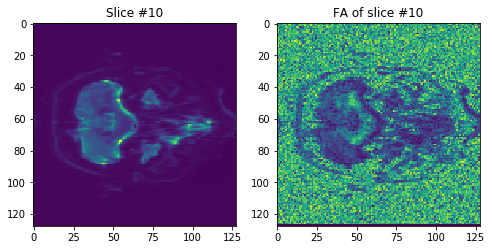

In [27]:
fig, ax = plt.subplots(1,2, figsize=(8, 8))
ax[0].set_title("Slice #"+str(10))
ax[0].imshow(dtidata[0,:,:,10])
ax[1].set_title("FA of slice #"+str(10))
ax[1].imshow(FA[0,:,:,10])

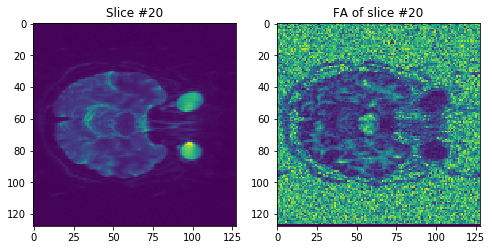

In [28]:
fig, ax = plt.subplots(1,2, figsize=(8, 8))
ax[0].set_title("Slice #"+str(20))
ax[0].imshow(dtidata[0,:,:,20])
ax[1].set_title("FA of slice #"+str(20))
ax[1].imshow(FA[0,:,:,20])

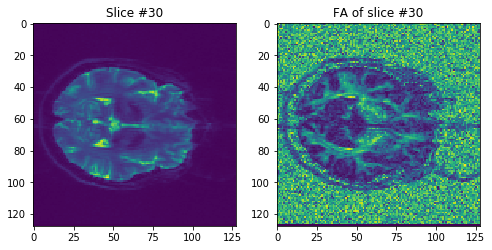

In [29]:
fig, ax = plt.subplots(1,2, figsize=(8, 8))
ax[0].set_title("Slice #"+str(30))
ax[0].imshow(dtidata[0,:,:,30])
ax[1].set_title("FA of slice #"+str(30))
ax[1].imshow(FA[0,:,:,30])

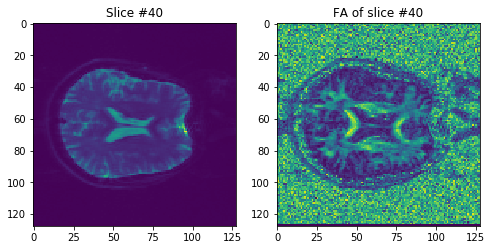

In [30]:
fig, ax = plt.subplots(1,2, figsize=(8, 8))
ax[0].set_title("Slice #"+str(40))
ax[0].imshow(dtidata[0,:,:,40])
ax[1].set_title("FA of slice #"+str(40))
ax[1].imshow(FA[0,:,:,40])